In [1]:
import sys
sys.path.extend(['..'])
import torch
import matplotlib.pyplot as plt
from math import sqrt, pi
import numpy as np
from mvn import MVNFull as MVN
%matplotlib inline

## 1d stuff

In [2]:
q = MVN(d=1)

In [3]:
def f(x):
    return -x*x*x*x/8 + x*x*x - 2*x*x - x*x/4

In [4]:
monte_carlo_ev, monte_carlo_mcse = q.monte_carlo_ev(f, n_samples=10000, include_mcse=True)

In [5]:
quad_ev = [q.quadrature_ev(f, n) for n in range(1,10)]

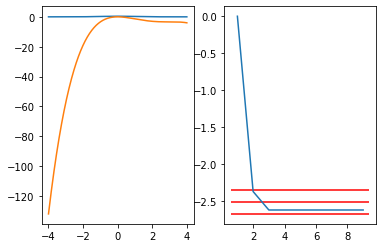

In [6]:
xgrid = torch.linspace(-4, 4, 500)
plt.subplot(1,2,1)
plt.plot(xgrid, q.to_torch_mvn().log_prob(xgrid[:,None]).exp())
plt.plot(xgrid, f(xgrid))
plt.subplot(1,2,2)
plt.plot(torch.arange(len(quad_ev))+1, quad_ev)
plt.hlines([monte_carlo_ev, monte_carlo_ev-3*monte_carlo_mcse, monte_carlo_ev+3*monte_carlo_mcse], *plt.xlim(), color='r')

## 2d stuff

In [7]:
# q2 = MVN(d=2)
q2 = MVN.new_random(d=2)

In [8]:
def f2(xy):
    x, y = xy[0], xy[1]
    return -x*x*x*x/8 + y*x*x - 2*y*y - x*x/4

In [9]:
monte_carlo_ev2, monte_carlo_mcse2 = q2.monte_carlo_ev(f2, n_samples=10000, include_mcse=True)

In [10]:
xrange = (q2.loc()[0]-4*q2.covariance()[0,0].sqrt(), q2.loc()[0]+4*q2.covariance()[0,0].sqrt())
yrange = (q2.loc()[1]-4*q2.covariance()[1,1].sqrt(), q2.loc()[1]+4*q2.covariance()[1,1].sqrt())
x, y = torch.linspace(*xrange,100), torch.linspace(*yrange,100)
xx, yy = torch.meshgrid(x,y)
grid_xy = torch.stack([xx.flatten(), yy.flatten()], dim=1)
lp = q2.to_torch_mvn().log_prob(grid_xy).reshape(xx.size())

In [11]:
quad_ev2 = [q2.quadrature_ev(f2, n) for n in range(1, 10)]

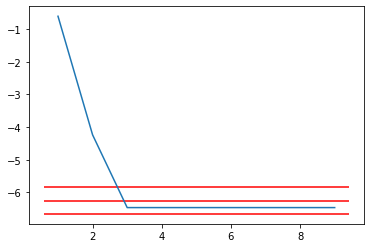

In [12]:
plt.plot(torch.arange(len(quad_ev2))+1, quad_ev2)
plt.hlines([monte_carlo_ev2, monte_carlo_ev2-3*monte_carlo_mcse2, monte_carlo_ev2+3*monte_carlo_mcse2], *plt.xlim(), color='r')